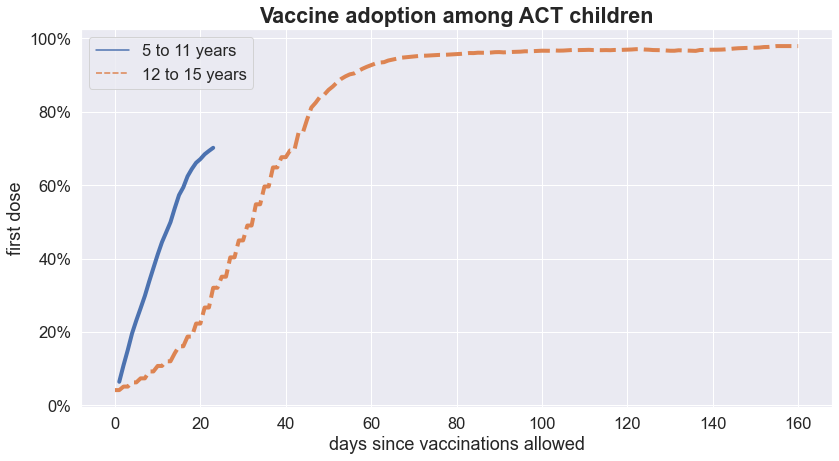

In [141]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt, matplotlib.dates as mdates, matplotlib.ticker as ticker
sns.set(font_scale=1.5)

data = pd.read_csv("fullVaxData.csv")
data.date = data.date.apply(lambda x: pd.Timestamp(x) - pd.Timedelta(days=1))
data.sort_values("date", inplace=True)
data.set_index("date", inplace=True)

data = data / [20401, 40207]

df = pd.DataFrame()

for i, d in enumerate(data.loc[[x for x in data.index if x > pd.Timestamp("2022-01-09")]]["ages 5-11"].values):
    df.at[i, "5 to 11 years"] = d

for i, d in enumerate(data["ages 12-15"].values):
    df.at[i, "12 to 15 years"] = d
    
fig, ax = plt.subplots(
    tight_layout=True,
    figsize=(12, 6.75)
)

sns.lineplot(data=df, ax=ax, lw=4)
plt.xlabel("days since vaccinations allowed")
plt.ylabel("first dose")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.title("Vaccine adoption among ACT children", fontsize="large", fontweight="bold")
plt.savefig("children.jpg")

In [2]:
data = pd.read_csv("./caseData.csv", parse_dates=["date"], index_col="date")

# pcr_data = data.loc[[x for x in data.index if (x > pd.Timestamp("2022-01-31")) & (x < pd.Timestamp("2022-02-08"))]]
# pos = pcr_data.pcr.sum() / (9875 + pcr_data.pcr.sum())

# print(pos)
# data.tail(25)

# data.to_csv("./caseData.csv")

In [240]:
import statsmodels.formula.api as smf

data = pd.read_csv("./caseData.csv", parse_dates=["date"], index_col="date")
data = data.loc[[x for x in data.index if x > pd.Timestamp("2021-11-30")]]

data[data.new == data.new.max()].index[0] + (data[data.new == data.new.max()].index[0] - data[data.new == data.new.min()].index[0])

Timestamp('2022-02-24 00:00:00')

In [ ]:
da